In [54]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pizza-vs-ice-cream/README.md
/kaggle/input/pizza-vs-ice-cream/dataset/valid/pizza/00432_jpg.rf.6cd6182d2adea1c7141a9680c6e31ae0.jpg
/kaggle/input/pizza-vs-ice-cream/dataset/valid/pizza/0020_jpg.rf.51fd91f227e503a6995c70bc475f0a22.jpg
/kaggle/input/pizza-vs-ice-cream/dataset/valid/pizza/00377_jpg.rf.8362614a2cd1e84d95aa39903f15a764.jpg
/kaggle/input/pizza-vs-ice-cream/dataset/valid/pizza/00516_jpg.rf.e0b51a2313ceff675b2c0cad95dcfc5c.jpg
/kaggle/input/pizza-vs-ice-cream/dataset/valid/pizza/00528_jpg.rf.69a98a3bc42bbba85db2ec4a991f251e.jpg
/kaggle/input/pizza-vs-ice-cream/dataset/valid/pizza/00347_jpg.rf.45c78681259ddc980c03597c53b3b910.jpg
/kaggle/input/pizza-vs-ice-cream/dataset/valid/pizza/00223_jpg.rf.0ca155cbf0c356534fdcfe6a32fed7a1.jpg
/kaggle/input/pizza-vs-ice-cream/dataset/valid/pizza/00167_jpg.rf.b2cfddf30ebe4f38e1cd85cf0d68903e.jpg
/kaggle/input/pizza-vs-ice-cream/dataset/valid/pizza/00367_jpg.rf.f7943b03000d10fc8951d3b56d50d0bb.jpg
/kaggle/input/pizza-vs-ice-crea

In [55]:
# Importing required libraries
import tensorflow 
import keras 
from keras.models import Sequential 
from keras.layers import Input, Flatten, Conv2D, MaxPooling2D, Dense, AveragePooling2D
from keras.utils import image_dataset_from_directory
from keras.layers import Dense, Dropout, BatchNormalization, Input 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
import cv2
from keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger, TensorBoard
import keras_tuner as kt 


In [56]:
train=ImageDataGenerator(rotation_range=90,horizontal_flip=True,
                  vertical_flip=True,rescale=1./255.) 
test=ImageDataGenerator(rescale=1./255.) 
validation=ImageDataGenerator(rescale=1./255.)

In [57]:
training=train.flow_from_directory('/kaggle/input/pizza-vs-ice-cream/dataset/train',target_size=(417,626),class_mode='binary',batch_size=32) 

Found 718 images belonging to 2 classes.


In [58]:
testg=test.flow_from_directory('/kaggle/input/pizza-vs-ice-cream/dataset/test',target_size=(417,626),class_mode='binary',batch_size=32) 

Found 106 images belonging to 2 classes.


In [59]:
validg=validation.flow_from_directory('/kaggle/input/pizza-vs-ice-cream/dataset/valid',target_size=(417,626),class_mode='binary',batch_size=32)

Found 208 images belonging to 2 classes.


## *Building the Model from Scratch *

In [60]:
model = Sequential()
model.add(Input(shape=(417,626, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))



In [61]:
model.summary() 

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 415, 624, 64)      1792      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 207, 312, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_10 (Conv2D)          (None, 205, 310, 128)     73856     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 102, 155, 128)     0         
 ng2D)                                                           
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 51, 77, 128)       0         
 ng2D)                                                           
                                                      

## *compile the model* 

In [62]:
 mc = ModelCheckpoint(r"model_checkoint\model{epoch}.h5",monitor="val_loss",verbose=1,save_best_only=True,)

In [64]:
csv = CSVLogger(r"log.csv")

In [65]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"]) 

In [66]:
history=model.fit(training,steps_per_epoch=718//32, epochs=20, validation_data=validg,
                  validation_steps=208//32,callbacks=[mc,csv]) 

Epoch 1/20
22/22 [==============================] - ETA: 0s - loss: 0.5962 - accuracy: 0.7230
Epoch 1: val_loss improved from inf to 2.57662, saving model to model_checkoint\model1.h5
22/22 [==============================] - 49s 2s/step - loss: 0.5962 - accuracy: 0.7230 - val_loss: 2.5766 - val_accuracy: 0.6875
Epoch 2/20
22/22 [==============================] - ETA: 0s - loss: 0.4704 - accuracy: 0.7784
Epoch 2: val_loss improved from 2.57662 to 0.55461, saving model to model_checkoint\model2.h5
22/22 [==============================] - 48s 2s/step - loss: 0.4704 - accuracy: 0.7784 - val_loss: 0.5546 - val_accuracy: 0.7500
Epoch 3/20
22/22 [==============================] - ETA: 0s - loss: 0.4212 - accuracy: 0.8149
Epoch 3: val_loss did not improve from 0.55461
22/22 [==============================] - 46s 2s/step - loss: 0.4212 - accuracy: 0.8149 - val_loss: 1.2142 - val_accuracy: 0.5104
Epoch 4/20
22/22 [==============================] - ETA: 0s - loss: 0.4149 - accuracy: 0.8134
Epoch 

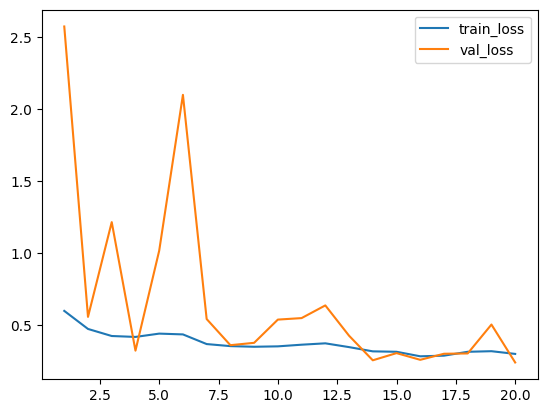

In [68]:
import matplotlib.pyplot as plt 
plt.plot(range(1,21),history.history["loss"],label="train_loss")
plt.plot(range(1,21),history.history["val_loss"],label="val_loss")
plt.legend()   

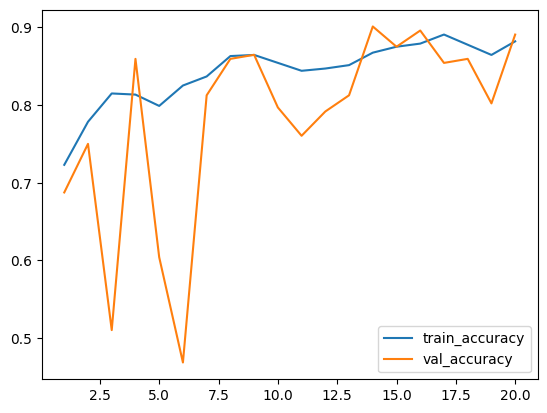

In [69]:
plt.plot(range(1,21),history.history["accuracy"],label="train_accuracy")
plt.plot(range(1,21),history.history["val_accuracy"],label="val_accuracy")
plt.legend() 

In [70]:
predic = model.predict(testg) 

4/4 [==============================] - 1s 243ms/step


In [71]:
predicted=np.where(predic>0.5,1,0)

accuracy_score :  0.6132075471698113


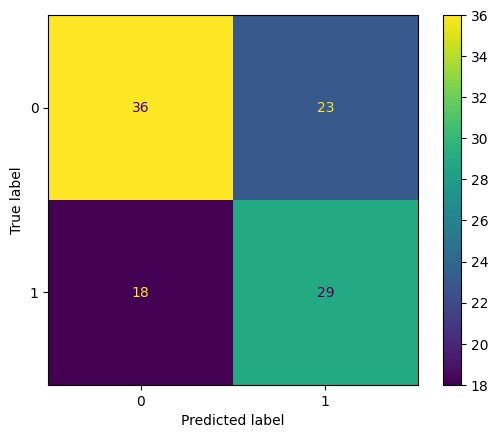

In [72]:
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,confusion_matrix
print("accuracy_score : ",accuracy_score(testg.labels,predicted)) 
cm=confusion_matrix(testg.labels,predicted)
va=ConfusionMatrixDisplay(cm)
va.plot() 
plt.show() 

In [73]:
model.save('best_model',save_format = 'h5')

# Read model
m1 = load_model(r'/kaggle/working/best_model')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
